# **데이터 수집 및 전처리**

In [1]:
'''
import requests
import json
import pandas as pd

url = 'http://apis.data.go.kr/1741000/DisasterMsg3/getDisasterMsg1List?ServiceKey=nCmTufo%2F3FAdjiRBmu%2B3HjkolIYRWcje17izXQ4hiWWZlUYEZ%2FACA6unHG8b9HBHcIzVexVCs3heIJXL04qj5A%3D%3D&type=json&pageNo=1&numOfRows=1000'
response = requests.get(url)
data = json.loads(response.text)
df = pd.DataFrame(columns=['msg'])
print(data)

for i in range(1000) :
    msg = data['DisasterMsg'][1]['row'][i]['msg']
    print(msg)
    print(i)
    df = df.append({'msg': msg}, ignore_index=True)

df.to_csv('재난문자.csv', index=False)
df['Class'] = 0
print(df)
'''

"\nimport requests\nimport json\nimport pandas as pd\n\nurl = 'http://apis.data.go.kr/1741000/DisasterMsg3/getDisasterMsg1List?ServiceKey=nCmTufo%2F3FAdjiRBmu%2B3HjkolIYRWcje17izXQ4hiWWZlUYEZ%2FACA6unHG8b9HBHcIzVexVCs3heIJXL04qj5A%3D%3D&type=json&pageNo=1&numOfRows=1000'\nresponse = requests.get(url)\ndata = json.loads(response.text)\ndf = pd.DataFrame(columns=['msg'])\nprint(data)\n\nfor i in range(1000) :\n    msg = data['DisasterMsg'][1]['row'][i]['msg']\n    print(msg)\n    print(i)\n    df = df.append({'msg': msg}, ignore_index=True)\n\ndf.to_csv('재난문자.csv', index=False)\ndf['Class'] = 0\nprint(df)\n"

In [2]:
'''
# None : 0 / 백신 : 1 / 확진자 경로 : 2 / 확진자 수 : 3 / 재난 : 4 / 실종 : 5

for i in range(len(df)) :
  if '백신' in df['msg'][i] :
    df['Class'][i] = 1
  if '방문' in df['msg'][i] or '이용' in df['msg'][i] :
    df['Class'][i] = 2
  if '확진자' in df['msg'][i] :
    df['Class'][i] = 3
  if '대피' in df['msg'][i] or '경보' in df['msg'][i] or '주의보' in df['msg'][i] or '호우' in df['msg'][i] or '폭염' in df['msg'][i] :
    df['Class'][i] = 4
  if '실종' in df['msg'][i] :
    df['Class'][i] = 5
  '''

"\n# None : 0 / 백신 : 1 / 확진자 경로 : 2 / 확진자 수 : 3 / 재난 : 4 / 실종 : 5\n\nfor i in range(len(df)) :\n  if '백신' in df['msg'][i] :\n    df['Class'][i] = 1\n  if '방문' in df['msg'][i] or '이용' in df['msg'][i] :\n    df['Class'][i] = 2\n  if '확진자' in df['msg'][i] :\n    df['Class'][i] = 3\n  if '대피' in df['msg'][i] or '경보' in df['msg'][i] or '주의보' in df['msg'][i] or '호우' in df['msg'][i] or '폭염' in df['msg'][i] :\n    df['Class'][i] = 4\n  if '실종' in df['msg'][i] :\n    df['Class'][i] = 5\n  "

# **자연어처리**

In [3]:
!pip install konlpy
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.14).
0 upgraded, 0 newly installed, 0 to remove and 95 not upgraded.
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [4]:
from konlpy.tag import Mecab
stopwords = ['의','을','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한',]
MorphModel = Mecab()

In [5]:
import pandas as pd
df_mod = pd.read_csv("/content/재난 문자 분류 - 시트1.csv")
df_mod

,msg,Class,notice,vaccine,route,infected,disaster,missing
0,[영동군청] 오늘 21:30 기준 추가 확진자 4명 발생. 확진자의 밀접 접촉자로 ...,3,0,0,0,1,0,0
1,[정읍시청]7.21(수)21시기준 확진자1명(정읍102번)발생/역학조사 후 세부내용...,3,0,0,0,1,0,0
2,[함양군청] 7.21.(수) 확진자 2명 발생 \n ▷이동동선 추적 및 접촉자 검사...,3,0,0,0,1,0,0
3,[부산시]7.14(수)~7.18(일)06:30~19:30/20(화)06:30~10시...,2,0,0,1,0,0,0
4,[부산시] 7.13.(화)20:20~21:30/ 7.14.(수)19시~20:30/7...,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
995,"[천안시청] 폭염주의보 발효중입니다. 충분한 물 마시기, 휴식 등 취하시고 코로나1...",4,0,0,0,0,1,0
996,"[구리시청] 7.15.(목) 확진자 11명(격리중4, 타지역3) 발생. 코로나19 ...",3,0,0,0,1,0,0
997,[나주시청] ▲거주지 보건소 또는 빛가람동 임시선별검사소를 운영(평일 9시~20시/...,0,1,0,0,0,0,0
998,"[경북도청]벅시노래방(유흥주점)(대구 남구 이천로37, 지하1층) 7/6 22시~7...",2,0,0,1,0,0,0


In [6]:
import re
for i in range(len(df_mod['msg'])) :
  df_mod['msg'][i] = re.sub(r'\[[^)]*\]', '', df_mod['msg'][i])
  df_mod['msg'][i] = re.sub("[^가-힣 ]","", df_mod['msg'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
X_data = []
for sentence in df_mod['msg']:
    temp_X = MorphModel.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_data.append(temp_X)
print(X_data)

[['오늘', '기준', '추가', '확진', '명', '발생', '확진', '밀접', '접촉자', '로', '이동', '동선', '파악', '중', '입니다', '타', '지역', '방문', '자제', '및', '유증', '상시', '선별', '진료소', '에서', '검사', '바랍니다'], ['수시', '기준', '확진', '자명', '정읍', '번', '발생', '역학', '조사', '후', '세부', '내용', '카카오톡', '채널', '업데이트', '예정'], ['수', '확진', '명', '발생', '이동', '동선', '추적', '및', '접촉자', '검사', '중', '타', '지역', '방문', '및', '사', '적', '모임', '자제', '하', '시', '고', '방역', '수칙', '철저히', '준', '수', '바랍니다'], ['수일', '화시', '녹천', '탕', '동래구', '금강', '공원', '로', '번', '길', '남탕', '방문자', '보건소', '검사', '바랍니다', '소독', '완료'], ['화', '수시', '목시', '옥스', '피', '씨방', '하단', '역점', '방문자', '보건소', '검사', '바랍니다'], ['목', '월', '스마일', '마사지', '덕양구', '통일로', '층', '방문자', '중', '코로나', '유증', '상자', '가까운', '보건소', '에서', '코로나', '검사', '받', '으시', '기', '바랍니다'], ['월일', '시', '기준', '일', '일', '확진', '명', '발생', '번', '홈페이지', '및', '블로그', '참고', '바랍니다'], ['안심', '숙소', '에서', '월일', '부터', '격리', '중', '인', '금일읍', '외국인', '명', '추가', '확진', '이동', '동선', '없음', '코로나', '예방', '접종', '세세', '세', '일', '시', '까지', '예약'], ['시민', '여러분', '관심', '제보', 

In [8]:
y_data = df_mod[['notice', 'vaccine', 'route', 'infected', 'disaster', 'missing']].astype(int)
print('문자 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

문자 본문의 개수: 1000
레이블의 개수: 1000


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) 
sequences = tokenizer.texts_to_sequences(X_data) 

In [11]:
print(sequences[:5])

[[56, 8, 147, 2, 4, 5, 2, 373, 52, 30, 162, 49, 195, 14, 102, 28, 18, 38, 45, 15, 93, 339, 16, 22, 13, 7, 3], [226, 8, 2, 127, 759, 23, 5, 88, 41, 110, 121, 50, 1037, 1038, 1039, 217], [43, 2, 4, 5, 162, 49, 760, 15, 52, 7, 14, 28, 18, 38, 15, 57, 33, 39, 45, 10, 1, 64, 40, 46, 300, 47, 43, 3], [761, 190, 1040, 448, 1041, 1042, 301, 30, 23, 66, 762, 31, 19, 7, 3, 136, 95], [67, 226, 513, 1043, 601, 1044, 1045, 1046, 31, 19, 7, 3]]


In [12]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'시': 1, '확진': 2, '바랍니다': 3, '명': 4, '발생': 5, '일': 6, '검사': 7, '기준': 8, '코로나': 9, '하': 10, '월': 11, '기': 12, '에서': 13, '중': 14, '및': 15, '선별': 16, '예약': 17, '지역': 18, '보건소': 19, '홈페이지': 20, '받': 21, '진료소': 22, '번': 23, '등': 24, '까지': 25, '생': 26, '참고': 27, '타': 28, '월일': 29, '로': 30, '방문자': 31, '참조': 32, '적': 33, '접종': 34, '년': 35, '으시': 36, '격리': 37, '방문': 38, '모임': 39, '방역': 40, '조사': 41, '블로그': 42, '수': 43, '세': 44, '자제': 45, '수칙': 46, '준': 47, '인': 48, '동선': 49, '내용': 50, '센터': 51, '접촉자': 52, '가까운': 53, '안전': 54, '예방': 55, '오늘': 56, '사': 57, '접촉': 58, '분': 59, '시시': 60, '사항': 61, '관련': 62, '자세': 63, '고': 64, '운영': 65, '길': 66, '화': 67, '이용': 68, '신': 69, '백신': 70, '토': 71, '사전': 72, '신규': 73, '폭염': 74, '습니다': 75, '거리': 76, '증상': 77, '안내': 78, '부터': 79, '콜': 80, '시기': 81, '여': 82, '가족': 83, '상': 84, '으세요': 85, '금': 86, '임시': 87, '역학': 88, '내': 89, '온라인': 90, '검사소': 91, '권': 92, '유증': 93, '마스크': 94, '완료': 95, '발효': 96, '준수': 97, '시간': 98, '주': 99, '이상': 100, '시분': 101, '입니다': 102, '두

In [13]:
print(sorted(tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True))

[('시', 723), ('확진', 651), ('바랍니다', 533), ('명', 529), ('발생', 435), ('일', 373), ('검사', 325), ('기준', 319), ('코로나', 285), ('하', 266), ('월', 241), ('기', 235), ('에서', 226), ('중', 213), ('및', 178), ('선별', 175), ('예약', 175), ('지역', 168), ('보건소', 165), ('홈페이지', 160), ('받', 153), ('진료소', 145), ('번', 143), ('등', 141), ('까지', 132), ('생', 126), ('참고', 125), ('타', 123), ('월일', 121), ('로', 118), ('방문자', 117), ('참조', 114), ('적', 111), ('접종', 111), ('년', 107), ('으시', 106), ('격리', 103), ('방문', 95), ('모임', 95), ('방역', 92), ('조사', 91), ('블로그', 88), ('수', 85), ('세', 84), ('자제', 83), ('수칙', 83), ('준', 80), ('인', 77), ('동선', 75), ('내용', 74), ('센터', 70), ('접촉자', 69), ('가까운', 69), ('안전', 69), ('예방', 68), ('오늘', 65), ('사', 64), ('접촉', 63), ('분', 63), ('시시', 62), ('사항', 61), ('관련', 60), ('자세', 59), ('고', 56), ('운영', 56), ('길', 55), ('화', 55), ('이용', 54), ('신', 54), ('백신', 52), ('토', 52), ('사전', 51), ('신규', 51), ('폭염', 51), ('습니다', 50), ('거리', 49), ('증상', 49), ('안내', 46), ('부터', 45), ('콜', 43), ('시기', 43), ('여', 

In [14]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 2026


In [15]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 800
테스트 데이터의 개수: 200


문자의 최대 길이 : 35
문자의 평균 길이 : 19.179000


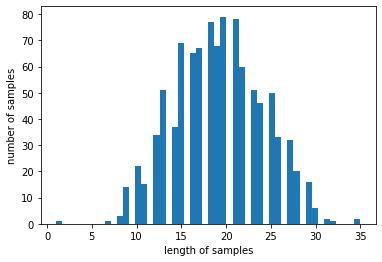

In [16]:
X_data = sequences
print('문자의 최대 길이 : %d' % max(len(l) for l in X_data))
print('문자의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
max_len = 35
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (1000, 35)


In [18]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train]) 

##**모델 학습**



In [20]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, ReLU
from tensorflow.keras.models import Sequential

In [21]:
vocab_size

2026

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 256)) 
model.add(LSTM(128)) 
model.add(Dense(6, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         518656    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 716,550
Trainable params: 716,550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
10/10 [==============================] - 4s 177ms/step - loss: 1.6476 - acc: 0.4922 - val_loss: 1.1426 - val_acc: 0.6625
Epoch 2/15
10/10 [==============================] - 1s 126ms/step - loss: 1.1206 - acc: 0.6109 - val_loss: 0.7603 - val_acc: 0.8062
Epoch 3/15
10/10 [==============================] - 1s 124ms/step - loss: 0.6086 - acc: 0.8109 - val_loss: 0.4487 - 

In [23]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

7/7 [==============================] - 0s 21ms/step - loss: 0.2083 - acc: 0.9600

 테스트 정확도: 0.9600


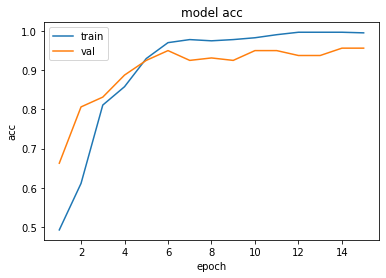

In [24]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
dat = ['[남양주시청] 8.6.(금) 남양주시 주민 18명 코로나19 확진. 방역사항은 홈페이지, 블로그 참고바랍니다. c11.kr/r4k7', '[고양시청]선별진료소 휴게시간 변경 알림▶보건소:12~14시▶화정ㆍ정발산역:13~15시(평일9:30~18시,주말9:30~13시 운영)▶고양종합운동장:13~14시']

for i in range(len(dat)) :
  dat[i] = re.sub(r'\[[^)]*\]', '', dat[i])
  dat[i] = re.sub("[^가-힣 ]","", dat[i])

dat_list = []
for sentence in dat:
    temp_X = MorphModel.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    dat_list.append(temp_X)
print(dat_list)

seq = tokenizer.texts_to_sequences(dat_list)
seq_pd = pad_sequences(seq, maxlen = max_len)
print(seq)
print(tokenizer.texts_to_sequences(dat_list)) 

model.predict(seq_pd)
# 공지 : 0 / 백신 : 1 / 확진자 경로 : 2 / 확진자 수 : 3 / 재난 : 4 / 실종 : 5

[['금', '남양주시', '주민', '명', '코로나', '확진', '방역', '사항', '홈페이지', '블로그', '참고', '바랍니다'], ['선별', '진료소', '휴게', '시간', '변경', '알림', '보건', '소시', '화정', '정발', '산역시', '평일', '시주', '말시', '운영', '고양', '종합', '운동', '장시']]
[[86, 340, 149, 4, 9, 2, 40, 61, 20, 42, 27, 3], [16, 22, 98, 305, 509, 134, 347, 1720, 167, 65, 367, 334, 575]]
[[86, 340, 149, 4, 9, 2, 40, 61, 20, 42, 27, 3], [16, 22, 98, 305, 509, 134, 347, 1720, 167, 65, 367, 334, 575]]


array([[5.5052212e-04, 2.8934977e-03, 1.6520427e-03, 9.9428093e-01,
        4.0111461e-04, 2.2187320e-04],
       [8.2255322e-01, 1.1633637e-01, 4.5941390e-02, 7.9633519e-03,
        3.6080596e-03, 3.5976726e-03]], dtype=float32)

In [28]:
import requests
import json
import pandas as pd

url = 'http://apis.data.go.kr/1741000/DisasterMsg3/getDisasterMsg1List?ServiceKey=nCmTufo%2F3FAdjiRBmu%2B3HjkolIYRWcje17izXQ4hiWWZlUYEZ%2FACA6unHG8b9HBHcIzVexVCs3heIJXL04qj5A%3D%3D&type=json&pageNo=1&numOfRows=10'
response = requests.get(url)
data = json.loads(response.text)
df = pd.DataFrame(columns=['msg'])
print(data)

for i in range(10) :
    msg = data['DisasterMsg'][1]['row'][i]['msg']
    print(msg)
    print(i)
    df = df.append({'msg': msg}, ignore_index=True)
df

{'DisasterMsg': [{'head': [{'list_total_count': 96455}, {}, {'RESULT': {'CODE': 'INFO-0', 'MESSAGE': '정상'}}]}, {'row': [{'create_date': '2021/08/10 18:54:04', 'location_id': '46', 'location_name': '경기도 의정부시', 'md101_sn': '116950', 'msg': '[의정부시청] 8월10일 18시 기준, 일일확진자 28명 발생(2117~2144번) 홈페이지 및 블로그https://c11.kr/joao 참고 바랍니다.', 'send_platform': 'cbs'}, {'create_date': '2021/08/10 18:53:34', 'location_id': '237', 'location_name': '충청남도 홍성군', 'md101_sn': '116949', 'msg': '[홍성군청]8월4일(수) 09:00~11:30 홍성추모공원 장례식장(홍성군 금마면 소재) 방문자는 가까운 선별진료소에서 검사 받으시기 바랍니다.', 'send_platform': 'cbs'}, {'create_date': '2021/08/10 18:50:06', 'location_id': '227', 'location_name': '충청남도 보령시', 'md101_sn': '116948', 'msg': '[보령시청] 8월10일(화) 18:50기준 보령시 신규 확진자 1명 발생(안양시 2571번 접촉자/자가격리중) 자세한 사항은 vo.la/onM84 참고바랍니다.', 'send_platform': 'cbs'}, {'create_date': '2021/08/10 18:42:27', 'location_id': '162', 'location_name': '울산광역시 전체', 'md101_sn': '116947', 'msg': '[울산광역시] 8.2.(월)~8.8.(일) 포메스숯불치킨(동구 녹수11길 45, 전하동, 소독완료) 방문자는 코로

,msg
0,"[의정부시청] 8월10일 18시 기준, 일일확진자 28명 발생(2117~2144번)..."
1,[홍성군청]8월4일(수) 09:00~11:30 홍성추모공원 장례식장(홍성군 금마면 ...
2,[보령시청] 8월10일(화) 18:50기준 보령시 신규 확진자 1명 발생(안양시 2...
3,"[울산광역시] 8.2.(월)~8.8.(일) 포메스숯불치킨(동구 녹수11길 45, 전..."
4,[영암군청] ② “수르혼 초이호나스 식당” (삼호읍 대불주거1로7길 31) 방문자는...
5,"[영암군청] ①타지역 확진자 관련 8.7.(토)18:00~21:20 , 8.8.(일..."
6,[홍성군청]8월10일(화) 18시 기준 확진자 5명(홍성139~143번) 발생. 자...
7,[진도군청] 8.10(화) 확진자 4명 발생(자가격리중 3명)▲김기중내과 8.9(월...
8,"[이천시청] 8월 10일 확진자 8명 발생(자가격리중5, 개별검사2, 확진자접촉1)..."
9,[남양주시청]8.10.(화) 주민 25명 코로나19 확진. 8.9.(월) 주민 1명...
